In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
import matplotlib.pyplot as plt 
import random   
import scipy
import scipy.stats

In [29]:
melt_table_complete = pd.read_csv("Core_Density_vary/Summary_Core_Density_Vary_Embedded.csv")

In [30]:
melt_table_complete.head()

,Unnamed: 0,index,Type,Core Density,CC AB,F1,Team_Strength,Team Size,Number_of_Self_Activations,Self Activation Status,Impurity,Indegree_Team_A,Indegree_Team_B,Outdegree_Team_A,Outdegree_Team_B,External Network Density
0,0,Density_20_TS_5_embed_P30N_C10N_trial_0,NaN,20.0,-0.999968,0.993433,0.0840,5,NaN,1,0.0,5.0,5.0,30.0,30.0,8.533333
1,1,Density_20_TS_5_embed_P30N_C10N_trial_1,NaN,20.0,0.366697,0.000590,0.0864,5,NaN,1,0.0,60.0,60.0,5.0,5.0,2.033333
2,2,Density_20_TS_5_embed_P30N_C10N_trial_2,NaN,20.0,-0.903917,0.020007,0.0271,5,NaN,1,0.0,55.0,55.0,95.0,95.0,3.566667
3,3,Density_20_TS_5_embed_P30N_C10N_trial_3,NaN,20.0,-0.532578,0.012873,0.0330,5,NaN,1,0.0,80.0,80.0,60.0,60.0,7.200000
4,4,Density_20_TS_5_embed_P30N_C10N_trial_4,NaN,20.0,-0.515072,0.020717,0.0324,5,NaN,1,0.0,15.0,15.0,50.0,50.0,3.866667


<Figure size 1600x1200 with 0 Axes>

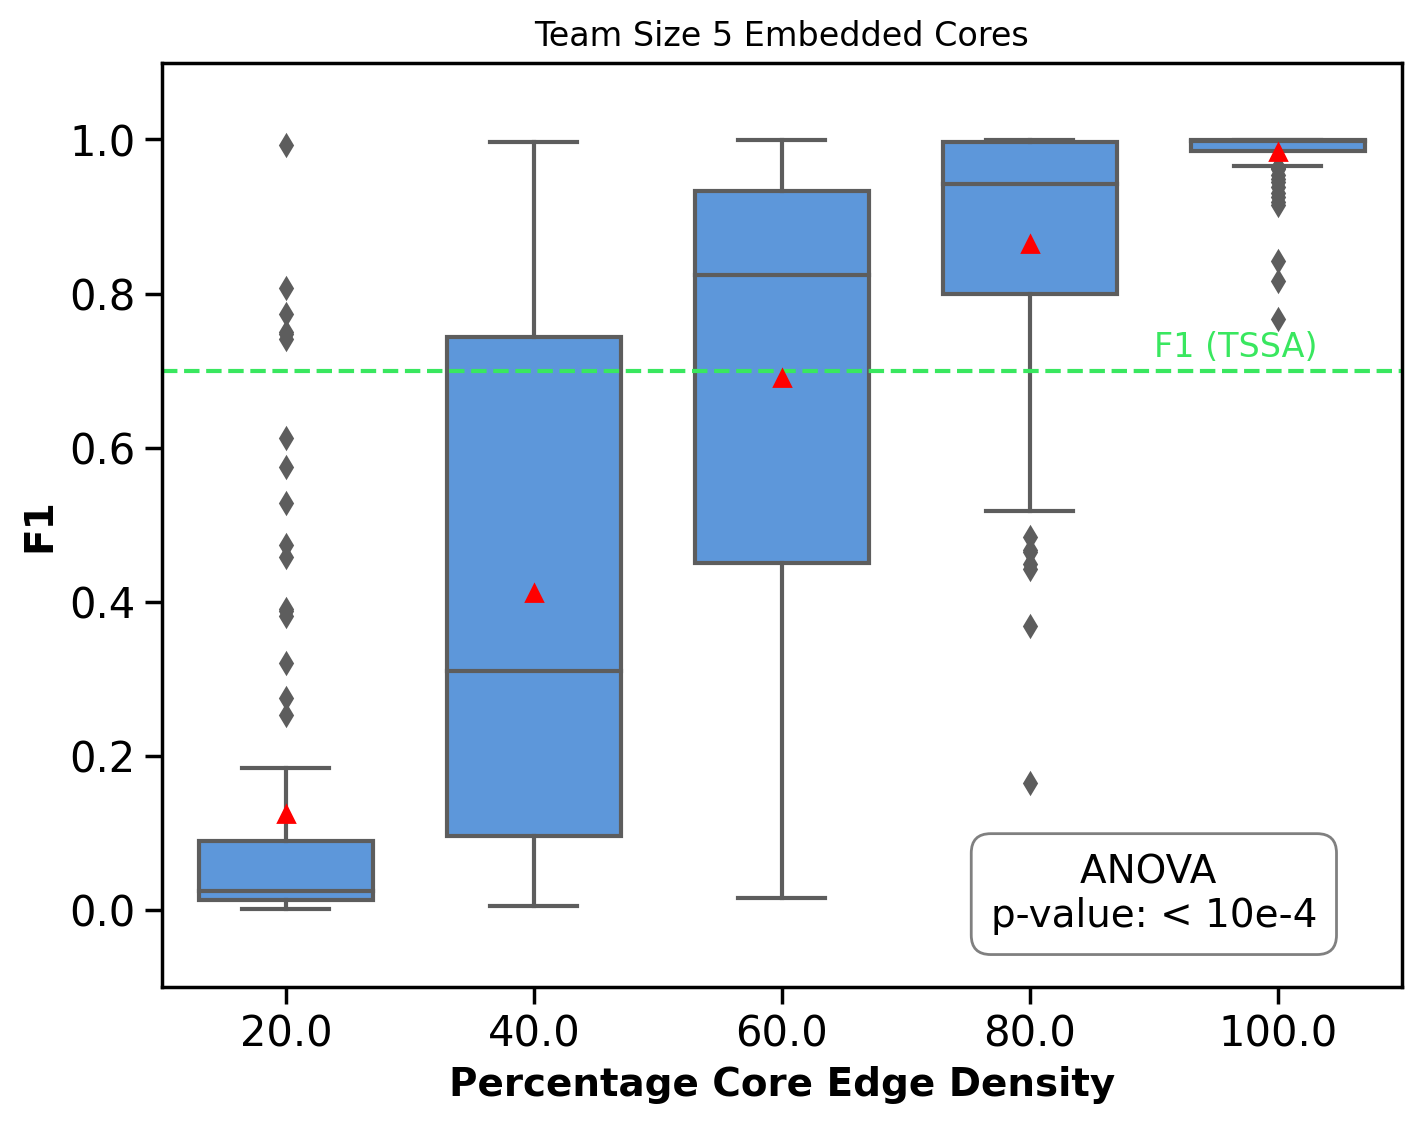

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# Set the figure size and DPI
plt.figure(figsize=(8, 6), dpi=200)
# plt.ylim(0, -1.04)

# Plot the boxplot
with sns.plotting_context("notebook"):
    plt.figure(figsize=(8, 6), dpi=200)
    ax = sns.boxplot(
        y='F1',
        x='Core Density',
        data=melt_table_complete,
        width=0.7,
        showmeans=True,
    color='#4895EF',
    meanprops={ "markerfacecolor":"red", "markeredgecolor":"red"} 
    )

    # plt.title('F1 Boolean vs Average Outdegree per code Node (Teamed Toggle Switch Embedded)')
    plt.xlabel('Percentage Core Edge Density', fontsize=14, fontweight='bold')
    plt.ylabel('F1', fontsize=14, fontweight='bold')
    plt.axhline(y=0.70, linestyle='--', color='#39e75f', label='y=0.55')
    plt.text(3.5, 0.73, 'F1 (TSSA)', color='#39e75f', ha='left', va='center', fontsize=12)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.ylim(-0.1, 1.1)

# Perform ANOVA across average indegree per code node
result = stats.f_oneway(*[melt_table_complete['F1'][melt_table_complete['Core Density'] == avg_indegree] for avg_indegree in melt_table_complete['Core Density'].unique()])

# Display the p-value from ANOVA
if result.pvalue < 10**-4:
    plt.text(0.8, 0.1, f'ANOVA \np-value: < 10e-4', fontsize =14,
              transform=plt.gca().transAxes, ha='center', va='center', 
              bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.5',
                       ))
else:
    plt.text(0.8, 0.1, f'ANOVA \np-value: {result.pvalue:.4f}',fontsize =14,
              transform=plt.gca().transAxes, ha='center', va='center', 
              bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.5'))

plt.title("Team Size 5 Embedded Cores")
plt.savefig('F1_Score_vs_Percentage_Core_Density_Embedded.png')
# Show the plot
plt.show()


In [43]:
melt_table_complete = pd.read_csv("Impurity_vary/Impurity_all_vary_TS_5_embed_P30N_C10N_trial.csv")

In [44]:
melt_table_complete.tail(2)

,Unnamed: 0,index,Team_Size,BiC A,CC AB,F1 Boolean,F1_Individual_Nodes_Considered,Team_Strength,Density,Impurity,...,Indegree_Team_A,Indegree_Team_B,Outdegree_Team_A,Outdegree_Team_B,Core Nodes,External Nodes,Core Density,% Impurity,External Network Density,Average Indegree per Core Node
598,598,random_98,Team Size 5,0,0,0.0,0,0,0,0,...,25.0,25.0,25.0,25.0,10.0,30.0,100.0,100.0,4.566667,random
599,599,random_99,Team Size 5,0,0,0.0,0,0,0,0,...,25.0,25.0,25.0,25.0,10.0,30.0,100.0,100.0,4.300000,random


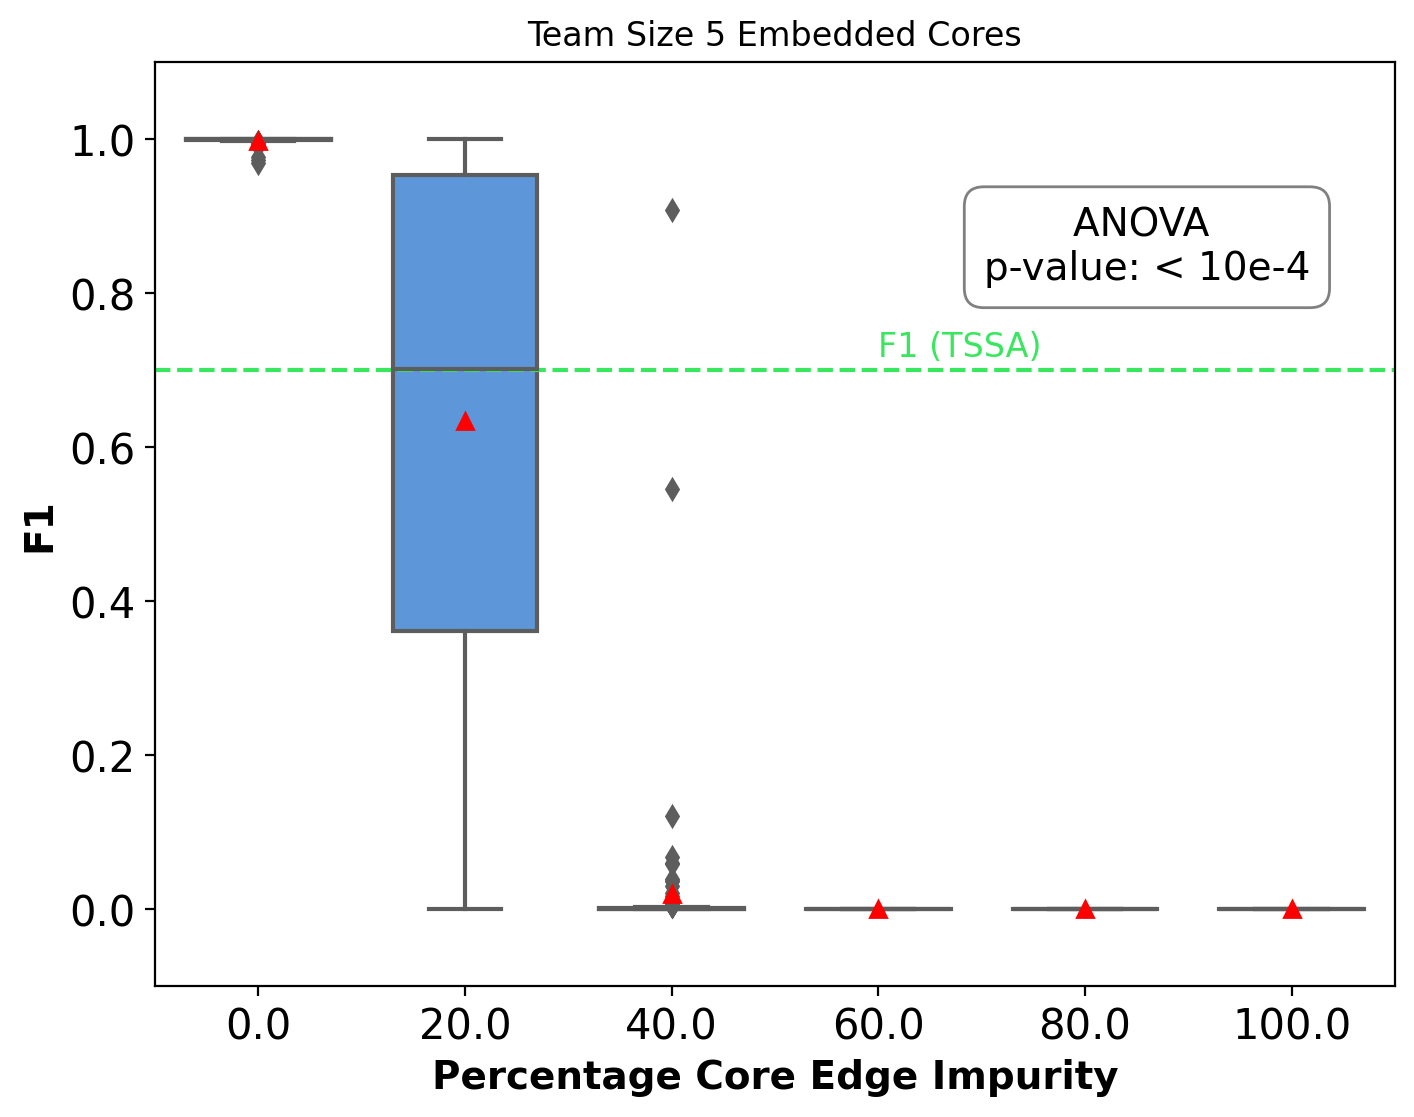

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# Set the figure size and DPI
plt.figure(figsize=(8, 6), dpi=200)
plt.ylim(0, -1.04)

# Plot the boxplot
with sns.plotting_context("notebook"):
    ax = sns.boxplot(
        y='F1 Boolean',
        x='% Impurity',
        data=melt_table_complete,
        width=0.7,
        showmeans=True,
        color='#4895EF',
        meanprops={"markerfacecolor":"red", "markeredgecolor":"red"}
    )

    plt.xlabel('Percentage Core Edge Impurity', fontsize=14, fontweight='bold')
    plt.ylabel('F1', fontsize=14, fontweight='bold')
    plt.axhline(y=0.70, linestyle='--', color='#39e75f', label='y=0.70')
    plt.text(3, 0.73, 'F1 (TSSA)', color='#39e75f', ha='left', va='center', fontsize=12)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.ylim(-0.1, 1.1)

# Perform ANOVA across average indegree per code node
result = stats.f_oneway(*[melt_table_complete['F1 Boolean'][melt_table_complete['% Impurity'] == avg_indegree] for avg_indegree in melt_table_complete['% Impurity'].unique()])

# Display the p-value from ANOVA
if result.pvalue < 10**-4:
    plt.text(0.8, 0.8, 'ANOVA \np-value: < 10e-4', fontsize=14,
             transform=plt.gca().transAxes, ha='center', va='center', 
             bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.5'))
else:
    plt.text(0.8, 0.8, f'ANOVA \np-value: {result.pvalue:.4f}', fontsize=14,
             transform=plt.gca().transAxes, ha='center', va='center', 
             bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.5'))

plt.title("Team Size 5 Embedded Cores")
plt.savefig('F1_Score_vs_Percentage_Core_Impurity_Embedded.png')
# Show the plot
plt.show()


In [46]:
melt_table_complete = pd.read_csv("Outdegree_vary/Summary_Outdegree_Vary_Embedded.csv")

In [47]:
melt_table_complete.loc[:,"Average Outdegree per Node of Team"] = melt_table_complete.loc[:,"Outdegree_Team_A"]/5

In [48]:
melt_table_complete

,Unnamed: 0,index,Type,Core Density,CC AB,F1,Team_Strength,Team Size,Number_of_Self_Activations,Self Activation Status,Impurity,Indegree_Team_A,Indegree_Team_B,Outdegree_Team_A,Outdegree_Team_B,External Network Density,Average Outdegree per Node of Team
0,0,Outdegree_0_TS_5_embed_P30N_C10N_trial_0,NaN,100.0,-1.000000,0.999883,1.0000,5,NaN,1,0.0,30.0,30.0,0.0,0.0,4.200000,0.0
1,1,Outdegree_0_TS_5_embed_P30N_C10N_trial_1,NaN,100.0,-0.988897,0.956810,1.0000,5,NaN,1,0.0,100.0,100.0,0.0,0.0,9.200000,0.0
2,2,Outdegree_0_TS_5_embed_P30N_C10N_trial_2,NaN,100.0,-0.971295,0.906727,1.0000,5,NaN,1,0.0,75.0,75.0,0.0,0.0,5.400000,0.0
3,3,Outdegree_0_TS_5_embed_P30N_C10N_trial_3,NaN,100.0,-0.999925,0.998247,1.0000,5,NaN,1,0.0,45.0,45.0,0.0,0.0,2.066667,0.0
4,4,Outdegree_0_TS_5_embed_P30N_C10N_trial_4,NaN,100.0,-1.000000,0.999987,1.0000,5,NaN,1,0.0,10.0,10.0,0.0,0.0,9.166667,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,95,Outdegree_20_TS_5_embed_P30N_C10N_trial_95,NaN,100.0,-0.879830,0.512677,0.1894,5,NaN,1,0.0,95.0,95.0,100.0,100.0,5.066667,20.0
1096,96,Outdegree_20_TS_5_embed_P30N_C10N_trial_96,NaN,100.0,-0.995931,0.991003,0.2255,5,NaN,1,0.0,60.0,60.0,100.0,100.0,7.900000,20.0
1097,97,Outdegree_20_TS_5_embed_P30N_C10N_trial_97,NaN,100.0,-1.000000,0.999667,0.3415,5,NaN,1,0.0,20.0,20.0,100.0,100.0,5.966667,20.0
1098,98,Outdegree_20_TS_5_embed_P30N_C10N_trial_98,NaN,100.0,-1.000000,0.999850,0.4070,5,NaN,1,0.0,20.0,20.0,100.0,100.0,3.633333,20.0


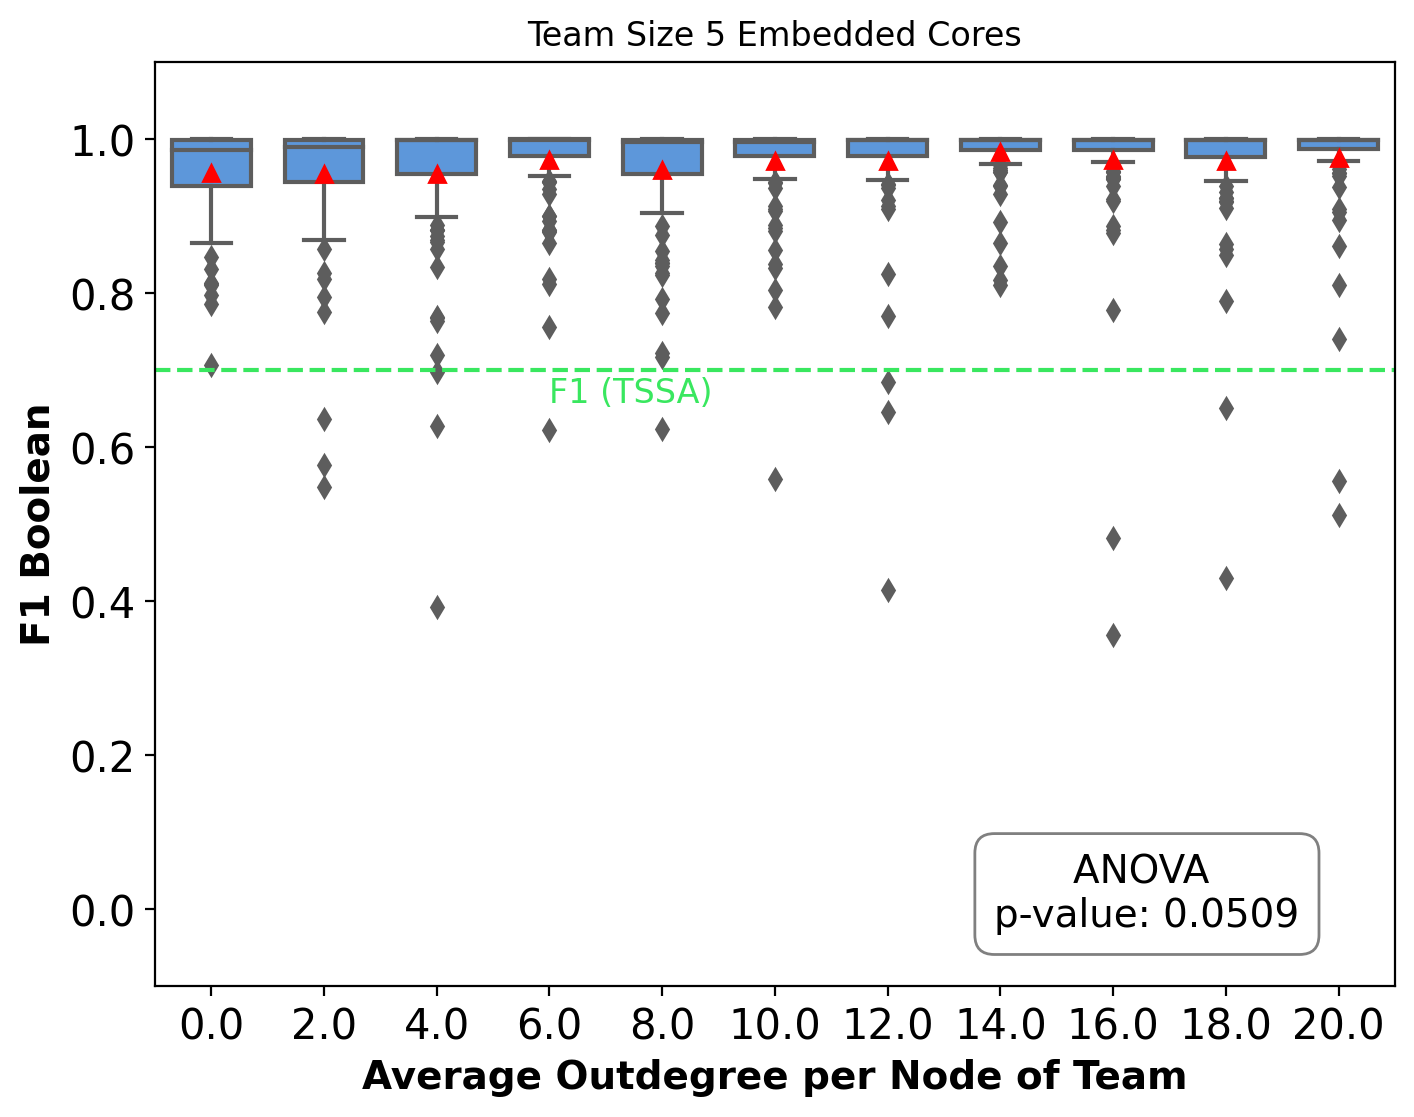

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# Set the figure size and DPI
plt.figure(figsize=(8, 6), dpi=200)
plt.ylim(0, -1.04)

# Plot the boxplot
with sns.plotting_context("notebook"):
    ax = sns.boxplot(
        y='F1',
        x='Average Outdegree per Node of Team',
        data=melt_table_complete,
        width=0.7,
        showmeans=True,
    color='#4895EF',
    meanprops={ "markerfacecolor":"red", "markeredgecolor":"red"} 
    )

    # plt.title('F1 Boolean vs Average Outdegree per code Node (Teamed Toggle Switch Embedded)')
    plt.xlabel('Average Outdegree per Node of Team', fontsize=14, fontweight='bold')
    plt.ylabel('F1 Boolean', fontsize=14, fontweight='bold')
    plt.axhline(y=0.70, linestyle='--', color='#39e75f', label='y=0.55')
    plt.text(3, 0.67, 'F1 (TSSA)', color='#39e75f', ha='left', va='center', fontsize=12)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.ylim(-0.1, 1.1)

# Perform ANOVA across average indegree per code node
result = stats.f_oneway(*[melt_table_complete['F1'][melt_table_complete['Average Outdegree per Node of Team'] == avg_indegree] for avg_indegree in melt_table_complete['Average Outdegree per Node of Team'].unique()])

# Display the p-value from ANOVA
if result.pvalue < 10**-4:
    plt.text(0.8, 0.1, f'ANOVA \np-value: < 10e-4', fontsize =14,
              transform=plt.gca().transAxes, ha='center', va='center', 
              bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.5',
                       ))
else:
    plt.text(0.8, 0.1, f'ANOVA \np-value: {result.pvalue:.4f}',fontsize =14,
              transform=plt.gca().transAxes, ha='center', va='center', 
              bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.5'))

plt.title("Team Size 5 Embedded Cores")
plt.savefig('F1_Score_vs_Indegree_Embedded.png')
# Show the plot
plt.show()


In [13]:
melt_table_complete = pd.read_csv("Mean_connectivity_vary/Summary_Mean_Connectivity_Vary_Embedded.csv")
melt_table_complete

# melt_table_complete.loc[:,"Average Outdegree per Node of Team"] = melt_table_complete.loc[:,"Outdegree_Team_A"]/5

,Unnamed: 0,index,Type,Core Density,CC AB,F1,Team_Strength,Team Size,Number_of_Self_Activations,Self Activation Status,Impurity,Indegree_Team_A,Indegree_Team_B,Outdegree_Team_A,Outdegree_Team_B,External Network Density
0,0,MC_2_TS_5_embed_P30N_C10N_trial_0,NaN,100.0,-1.000000,0.998743,0.7403,5,NaN,1,0.0,45.0,45.0,10.0,10.0,2.0
1,1,MC_2_TS_5_embed_P30N_C10N_trial_1,NaN,100.0,-1.000000,0.999687,0.8714,5,NaN,1,0.0,25.0,25.0,10.0,10.0,2.0
2,2,MC_2_TS_5_embed_P30N_C10N_trial_2,NaN,100.0,-0.976521,0.950043,0.2627,5,NaN,1,0.0,60.0,60.0,95.0,95.0,2.0
3,3,MC_2_TS_5_embed_P30N_C10N_trial_3,NaN,100.0,-1.000000,0.998840,0.3505,5,NaN,1,0.0,40.0,40.0,75.0,75.0,2.0
4,4,MC_2_TS_5_embed_P30N_C10N_trial_4,NaN,100.0,-0.965715,0.909110,0.3249,5,NaN,1,0.0,100.0,100.0,35.0,35.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,95,MC_10_TS_5_embed_P30N_C10N_trial_95,NaN,100.0,-1.000000,0.999977,0.3902,5,NaN,1,0.0,20.0,20.0,70.0,70.0,10.0
896,96,MC_10_TS_5_embed_P30N_C10N_trial_96,NaN,100.0,-1.000000,0.999970,0.7873,5,NaN,1,0.0,25.0,25.0,5.0,5.0,10.0
897,97,MC_10_TS_5_embed_P30N_C10N_trial_97,NaN,100.0,-1.000000,0.999937,0.3513,5,NaN,1,0.0,20.0,20.0,100.0,100.0,10.0
898,98,MC_10_TS_5_embed_P30N_C10N_trial_98,NaN,100.0,-0.999620,0.997003,0.2167,5,NaN,1,0.0,65.0,65.0,90.0,90.0,10.0


In [14]:
melt_table_complete.loc[:,'External Network Density']= melt_table_complete.loc[:,'External Network Density'].astype(int)

/tmp/ipykernel_738651/2607838626.py:1: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  melt_table_complete.loc[:,'External Network Density']= melt_table_complete.loc[:,'External Network Density'].astype(int)


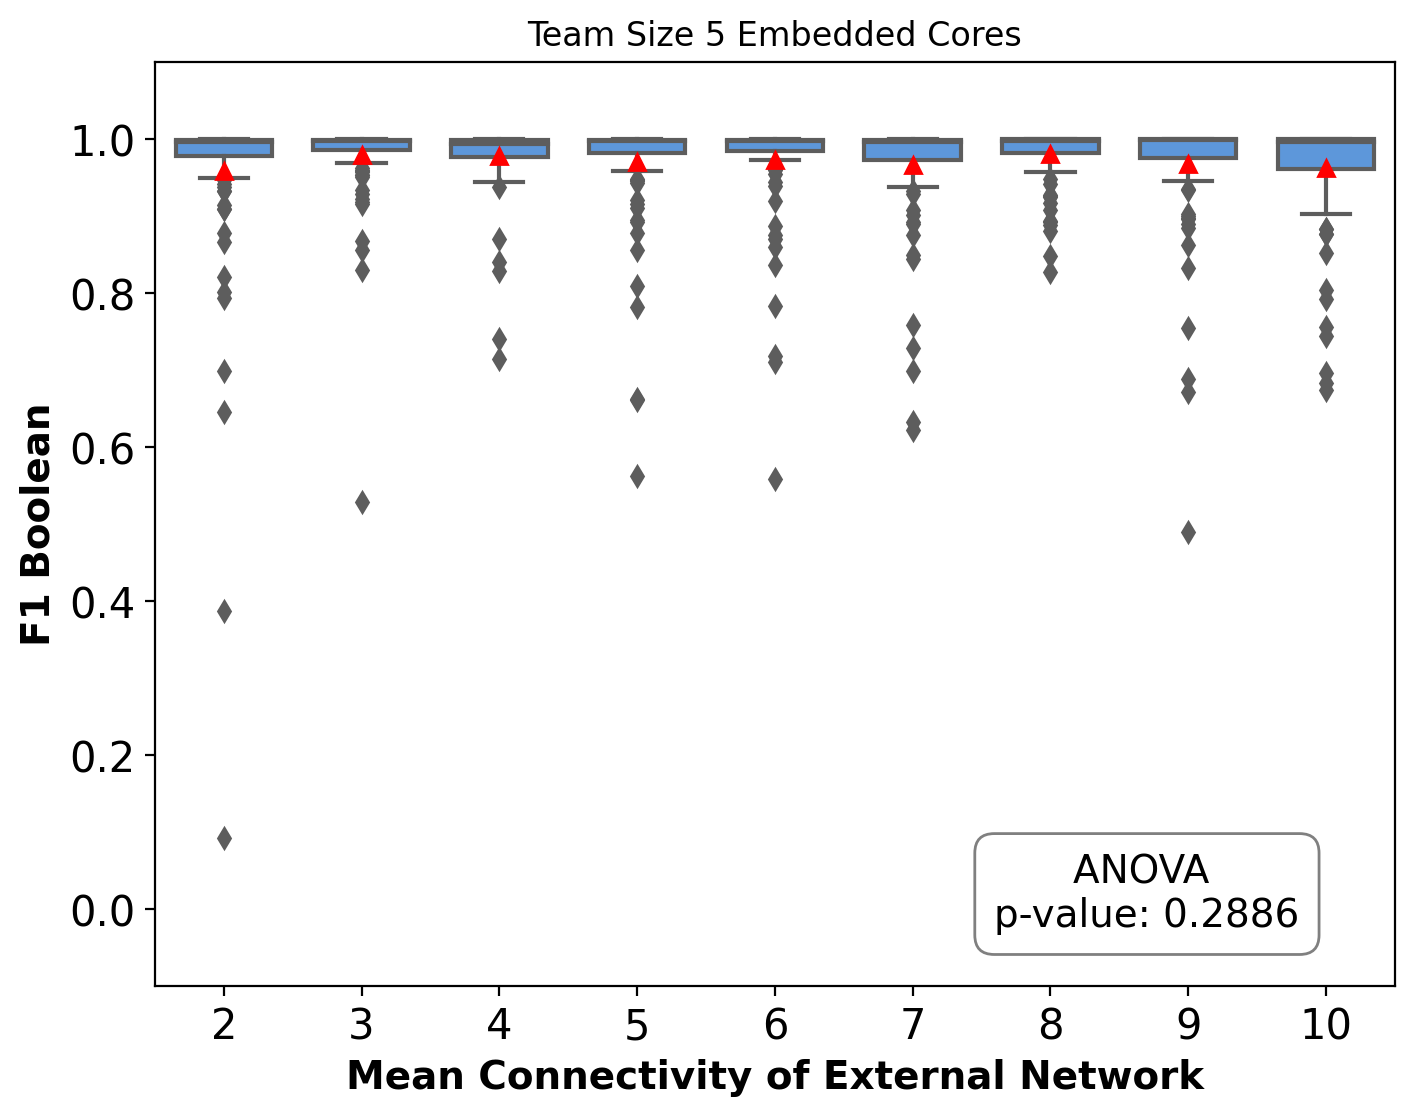

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# Set the figure size and DPI
plt.figure(figsize=(8, 6), dpi=200)
plt.ylim(0, -1.04)

# Plot the boxplot
with sns.plotting_context("notebook"):
    ax = sns.boxplot(
        y='F1',
        x='External Network Density',
        data=melt_table_complete,
        width=0.7,
        showmeans=True,
    color='#4895EF',
    meanprops={ "markerfacecolor":"red", "markeredgecolor":"red"} 
    )

    # plt.title('F1 Boolean vs Average Outdegree per code Node (Teamed Toggle Switch Embedded)')
    plt.xlabel('Mean Connectivity of External Network', fontsize=14, fontweight='bold')
    plt.ylabel('F1 Boolean', fontsize=14, fontweight='bold')
    # plt.axhline(y=0.79, linestyle='--', color='#39e75f', label='y=0.55')
    # plt.text(3, 0.73, 'F1 (TSSA)', color='#39e75f', ha='left', va='center', fontsize=12)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.ylim(-0.1, 1.1)

# Perform ANOVA across average indegree per code node
result = stats.f_oneway(*[melt_table_complete['F1'][melt_table_complete['External Network Density'] == avg_indegree] for avg_indegree in melt_table_complete['External Network Density'].unique()])

# Display the p-value from ANOVA
if result.pvalue < 10**-4:
    plt.text(0.8, 0.1, f'ANOVA \np-value: < 10e-4', fontsize =14,
              transform=plt.gca().transAxes, ha='center', va='center', 
              bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.5',
                       ))
else:
    plt.text(0.8, 0.1, f'ANOVA \np-value: {result.pvalue:.4f}',fontsize =14,
              transform=plt.gca().transAxes, ha='center', va='center', 
              bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.5'))

plt.title("Team Size 5 Embedded Cores")
# plt.savefig('F1_Score_vs_Percentage_Core_Density.png')
# Show the plot
plt.show()


In [2]:
melt_table_complete = pd.read_csv("Indegree_vary/Summary_Indegree_Vary_Embedded.csv")
melt_table_complete
melt_table_complete.loc[:,"Average Indegree per Node of Team"] = melt_table_complete.loc[:,"Indegree_Team_A"]/5
# melt_table_complete.loc[:,"Average Outdegree per Node of Team"] = melt_table_complete.loc[:,"Outdegree_Team_A"]/5

NameError: name 'pd' is not defined

NameError: name 'melt_table_complete' is not defined

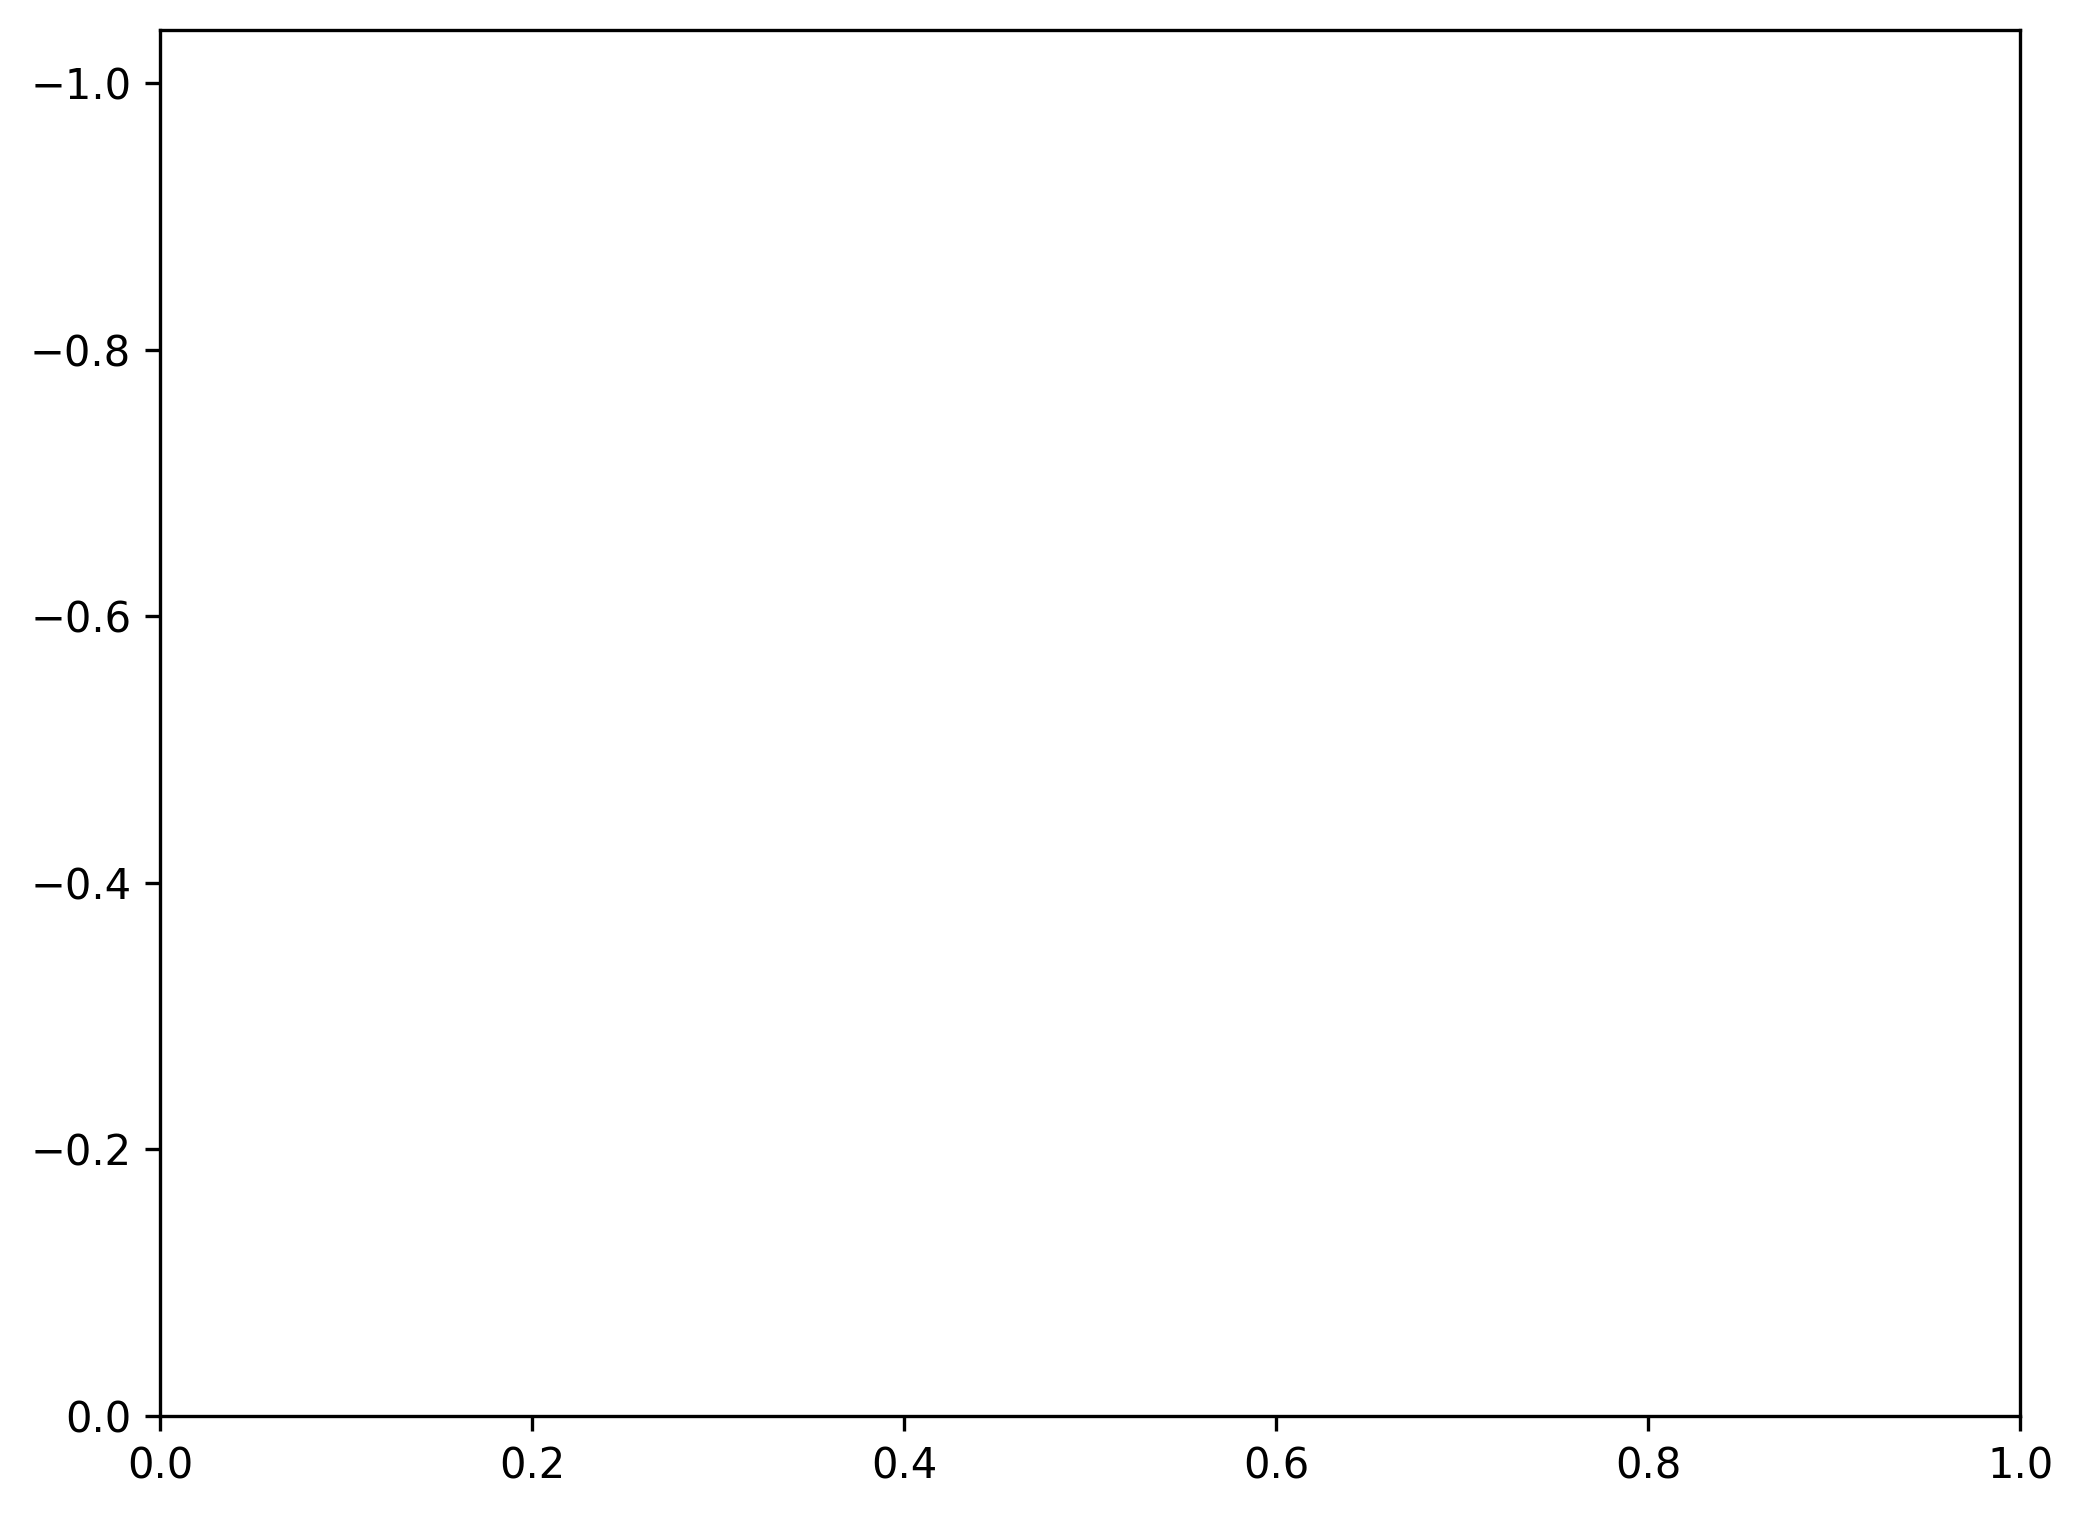

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# Set the figure size and DPI
plt.figure(figsize=(8, 6), dpi=300)
plt.ylim(0, -1.04)

# Plot the boxplot
with sns.plotting_context("notebook"):
    
    ax = sns.boxplot(
        y='F1',
        x='Average Indegree per Node of Team',
        data=melt_table_complete,
        width=0.7,
        showmeans=True,
    color='#4895EF',
    meanprops={ "markerfacecolor":"red", "markeredgecolor":"red"} 
    )

    # plt.title('F1 Boolean vs Average Outdegree per code Node (Teamed Toggle Switch Embedded)')
    plt.xlabel('Average Indegree per Node of Team', fontsize=14, fontweight='bold')
    plt.ylabel('F1 Boolean', fontsize=14, fontweight='bold')
    plt.axhline(y=0.70, linestyle='--', color='#39e75f', label='y=0.55')
    plt.text(2, 0.73, 'F1 (TSSA)', color='#39e75f', ha='left', va='center', fontsize=12)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.ylim(-0.1, 1.1)

# Perform ANOVA across average indegree per code node
result = stats.f_oneway(*[melt_table_complete['F1'][melt_table_complete['Average Indegree per Node of Team'] == avg_indegree] for avg_indegree in melt_table_complete['Average Indegree per Node of Team'].unique()])

# Display the p-value from ANOVA
if result.pvalue < 10**-4:
    plt.text(0.8, 0.1, f'ANOVA \np-value: < 10e-4', fontsize =14,
              transform=plt.gca().transAxes, ha='center', va='center', 
              bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.5',
                       ))
else:
    plt.text(0.8, 0.1, f'ANOVA \np-value: {result.pvalue:.4f}',fontsize =14,
              transform=plt.gca().transAxes, ha='center', va='center', 
              bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.5'))

plt.title("Team Size 5 Embedded Cores")
# plt.savefig('F1_Score_vs_Percentage_Core_Density.png')
# Show the plot
plt.show()


In [18]:
melt_table_complete = pd.read_csv("TeamSize_vary/Summary_All_Team_Size_Files_Vary_Embedded.csv")
melt_table_complete
# melt_table_complete.loc[:,"Average Indegree per Node of Team"] = melt_table_complete.loc[:,"Indegree_Team_A"]/5
# melt_table_complete.loc[:,"Average Outdegree per Node of Team"] = melt_table_complete.loc[:,"Outdegree_Team_A"]/5

,Unnamed: 0,index,Type,Core Density,CC AB,F1,Team_Strength,Team Size,Number_of_Self_Activations,Self Activation Status,Impurity,Indegree_Team_A,Indegree_Team_B,Outdegree_Team_A,Outdegree_Team_B,External Network Density
0,0,TS_1_embed_P30N_C2N_trial_0,NaN,100.0,0.041042,0.483627,0.117500,1,NaN,1,0.0,17.0,17.0,8.0,8.0,5.766667
1,1,TS_1_embed_P30N_C2N_trial_1,NaN,100.0,-0.341624,0.689687,0.185000,1,NaN,1,0.0,9.0,9.0,7.0,7.0,7.700000
2,2,TS_1_embed_P30N_C2N_trial_2,NaN,100.0,-0.964559,0.977030,0.162500,1,NaN,1,0.0,10.0,10.0,10.0,10.0,6.900000
3,3,TS_1_embed_P30N_C2N_trial_3,NaN,100.0,-0.218528,0.651747,0.132500,1,NaN,1,0.0,16.0,16.0,9.0,9.0,9.300000
4,4,TS_1_embed_P30N_C2N_trial_4,NaN,100.0,-0.447864,0.723957,0.312500,1,NaN,1,0.0,2.0,2.0,7.0,7.0,2.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,95,TS_6_embed_P30N_C12N_trial_95,NaN,100.0,-1.000000,0.999870,0.359375,6,NaN,1,0.0,114.0,114.0,42.0,42.0,5.733333
596,96,TS_6_embed_P30N_C12N_trial_96,NaN,100.0,-1.000000,1.000000,0.387431,6,NaN,1,0.0,30.0,30.0,96.0,96.0,9.833333
597,97,TS_6_embed_P30N_C12N_trial_97,NaN,100.0,-1.000000,0.999910,0.315764,6,NaN,1,0.0,54.0,54.0,120.0,120.0,5.666667
598,98,TS_6_embed_P30N_C12N_trial_98,NaN,100.0,-0.998362,0.995087,0.333333,6,NaN,1,0.0,120.0,120.0,48.0,48.0,4.566667


In [23]:
melt_table_complete.groupby(['Team Size']).mean()

/tmp/ipykernel_738651/4289741599.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  melt_table_complete.groupby(['Team Size']).mean()


,Unnamed: 0,Type,Core Density,CC AB,F1,Team_Strength,Number_of_Self_Activations,Self Activation Status,Impurity,Indegree_Team_A,Indegree_Team_B,Outdegree_Team_A,Outdegree_Team_B,External Network Density
Team Size,,,,,,,,,,,,,,
1,49.5,NaN,100.0,-0.391796,0.700642,0.193750,NaN,1.0,0.0,11.27,11.27,10.14,10.14,6.061333
2,49.5,NaN,100.0,-0.795471,0.704039,0.271331,NaN,1.0,0.0,19.96,19.96,20.72,20.72,5.873667
3,49.5,NaN,100.0,-0.950287,0.848630,0.343636,NaN,1.0,0.0,28.71,28.71,33.09,33.09,5.891667
4,49.5,NaN,100.0,-0.981817,0.936027,0.345138,NaN,1.0,0.0,42.64,42.64,49.00,49.00,5.797000
5,49.5,NaN,100.0,-0.992107,0.973474,0.430176,NaN,1.0,0.0,49.45,49.45,55.85,55.85,6.216667
6,49.5,NaN,100.0,-0.995674,0.982895,0.435282,NaN,1.0,0.0,68.70,68.70,68.04,68.04,5.917333


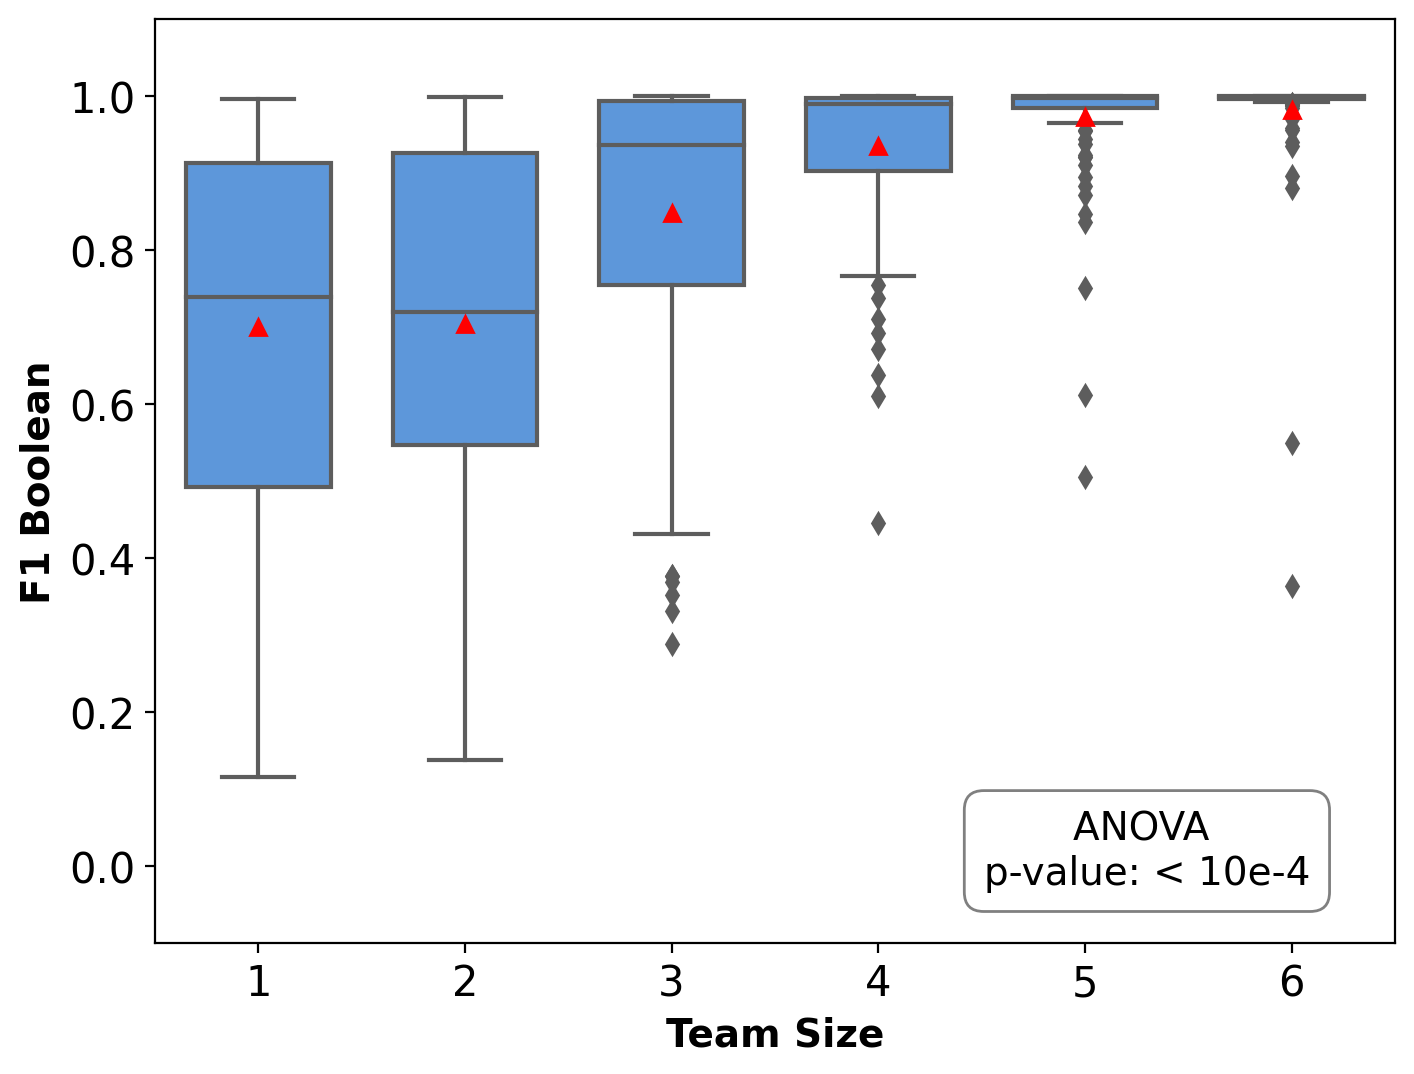

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# Set the figure size and DPI
plt.figure(figsize=(8, 6), dpi=200)
plt.ylim(0, -1.04)

# Plot the boxplot
with sns.plotting_context("notebook"):
    ax = sns.boxplot(
        y='F1',
        x='Team Size',
        data=melt_table_complete,
        width=0.7,
        showmeans=True,
    color='#4895EF',
    meanprops={ "markerfacecolor":"red", "markeredgecolor":"red"} 
    )

    # plt.title('F1 Boolean vs Average Outdegree per code Node (Teamed Toggle Switch Embedded)')
    plt.xlabel('Team Size', fontsize=14, fontweight='bold')
    plt.ylabel('F1 Boolean', fontsize=14, fontweight='bold')
    # plt.axhline(y=0.79, linestyle='--', color='#39e75f', label='y=0.55')
    # plt.text(3, 0.73, 'F1 (TSSA)', color='#39e75f', ha='left', va='center', fontsize=12)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.ylim(-0.1, 1.1)

# Perform ANOVA across average indegree per code node
result = stats.f_oneway(*[melt_table_complete['F1'][melt_table_complete['Team Size'] == avg_indegree] for avg_indegree in melt_table_complete['Team Size'].unique()])

# Display the p-value from ANOVA
if result.pvalue < 10**-4:
    plt.text(0.8, 0.1, f'ANOVA \np-value: < 10e-4', fontsize =14,
              transform=plt.gca().transAxes, ha='center', va='center', 
              bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.5',
                       ))
else:
    plt.text(0.8, 0.1, f'ANOVA \np-value: {result.pvalue:.4f}',fontsize =14,
              transform=plt.gca().transAxes, ha='center', va='center', 
              bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.5'))

# plt.title("Team Size 5 Embedded Cores")
# plt.savefig('F1_Score_vs_Percentage_Core_Density.png')
# Show the plot
plt.show()


In [57]:
database = pd.read_csv('All_vary_June_13.csv', index_col= 0)
database.columns = ['index', 'Percentage Core Edge Density', 'CC AB', 'F1 Boolean', 'Team_Strength', 'Team Size',
       'Self Activation Status', 'Percentage Core Edge Impurity', 'Indegree_Team_A',
       'Indegree_Team_B', 'Outdegree_Team_A', 'Outdegree_Team_B',
       'External Network Density']


In [58]:
database.loc[:,'Indegree'] = database.loc[:,'Indegree_Team_A'] 
database.loc[:,'Outdegree'] = database.loc[:,'Outdegree_Team_A'] 

In [59]:
database = database.loc[:,['F1 Boolean','Percentage Core Edge Impurity','Percentage Core Edge Density','External Network Density','Outdegree','Indegree']]

In [60]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [61]:
ss = StandardScaler()

scaled_database =database.copy()
scaled_database.loc[:,:] = ss.fit_transform(database)

In [86]:
scaled_database


,F1 Boolean,Percentage Core Edge Impurity,Percentage Core Edge Density,External Network Density,Outdegree,Indegree
0,-0.433936,0.469449,1.619764,1.097138,-0.035819,-0.958692
1,-0.433936,1.803813,-1.100496,1.450144,-1.573868,-0.784207
2,-0.431513,-0.178670,1.166387,-1.769273,-1.402974,0.088220
3,-0.433936,1.803813,-1.251622,-0.371368,-0.719397,-0.435236
4,-0.433936,1.803813,0.713010,-1.444508,0.305969,-0.609722
...,...,...,...,...,...,...
2495,-0.388018,-0.686999,-0.647120,0.800613,-0.377608,-0.435236
2496,2.712502,-1.398660,-0.344869,0.871214,1.502229,-0.260751
2497,-0.389021,-0.758165,1.015262,-1.684552,-1.061185,-1.482148
2498,-0.433936,1.129608,0.864136,0.984176,1.160441,1.484103


In [63]:
scaled_database_projected_on_F1 = pd.DataFrame()
columns_dat = scaled_database.columns
for i in columns_dat:
    v1 = np.array(scaled_database.loc[:,'F1 Boolean'])
    v2 = np.array(scaled_database.loc[:,i])
    scaled_database_projected_on_F1.loc[0,i] = np.dot(v1,v2)/(np.dot(v1,v1)**0.5 * np.dot(v2,v2)**0.5)

In [78]:
scaled_database_projected_on_F1

,F1 Boolean,Percentage Core Edge Impurity,Percentage Core Edge Density,External Network Density,Outdegree,Indegree
0,1.0,-0.483569,0.265818,0.022117,0.030024,-0.17649


In [66]:
scaled_database_projected_on_F1.columns

Index(['F1 Boolean', 'Percentage Core Edge Impurity',
       'Percentage Core Edge Density', 'External Network Density', 'Outdegree',
       'Indegree'],
      dtype='object')

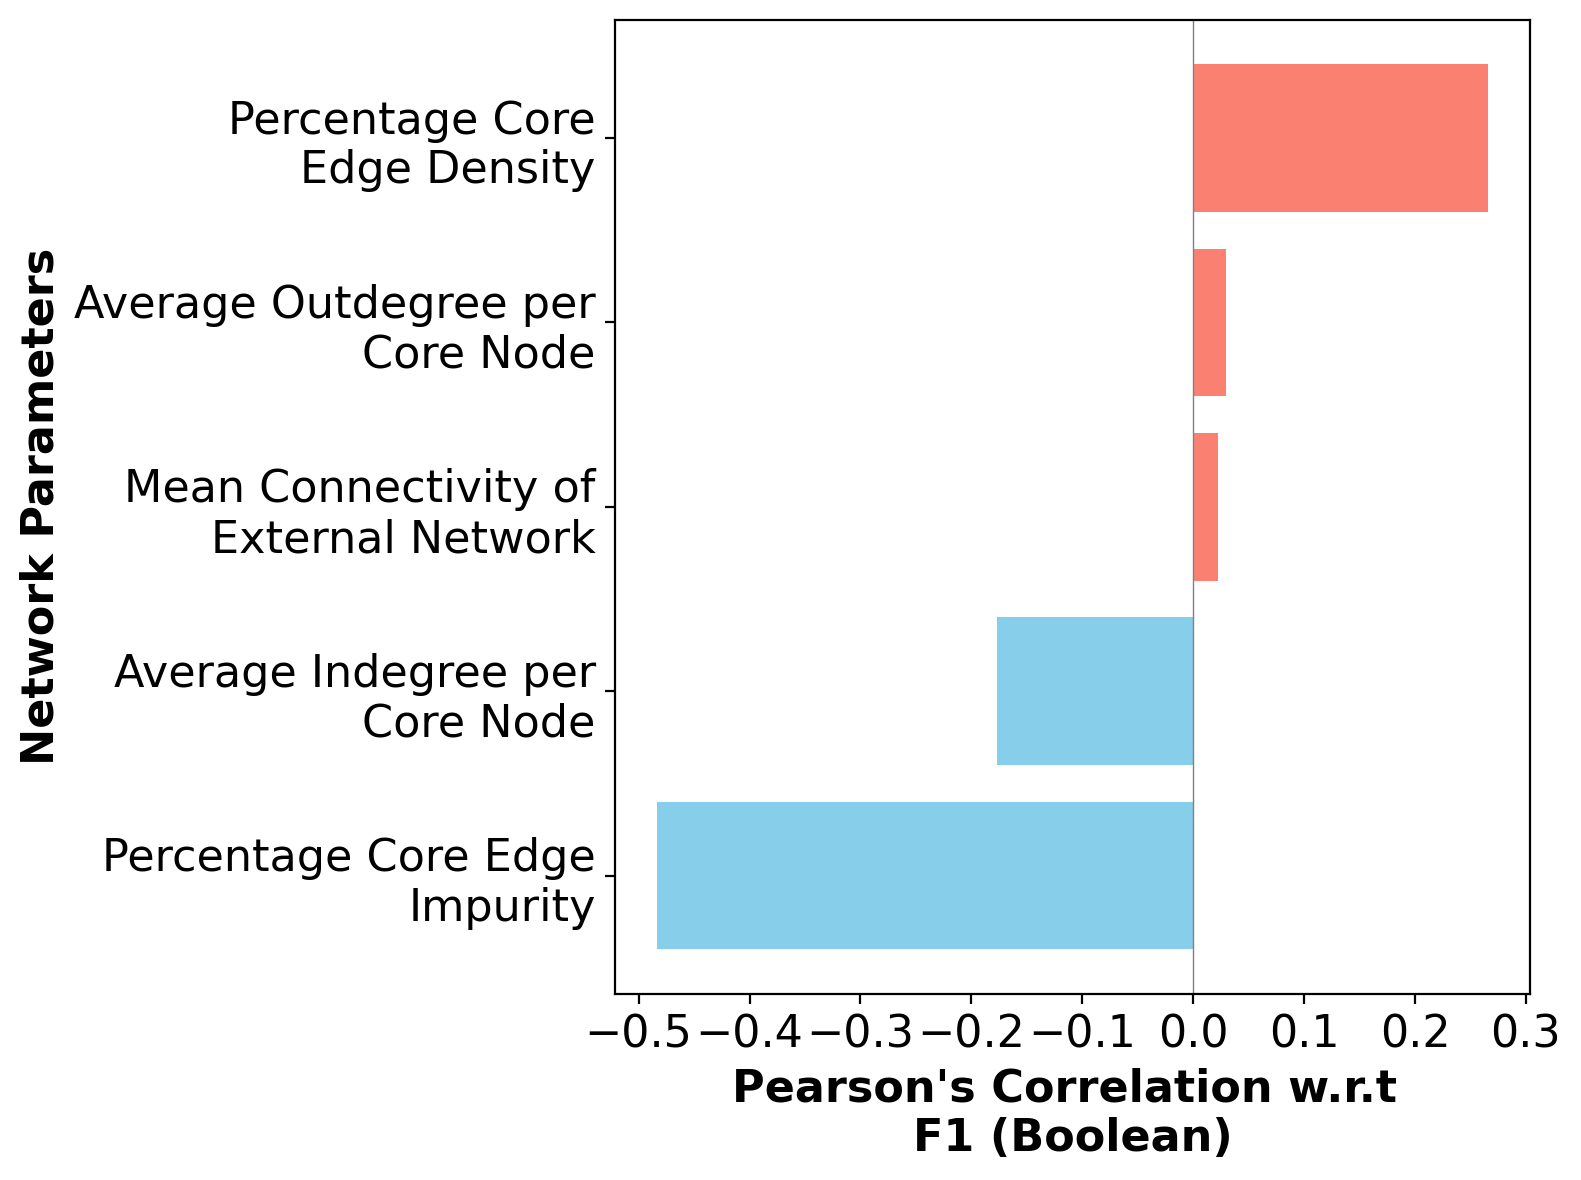

In [84]:
import matplotlib.pyplot as plt

# Sample data
categories = [
    'Percentage Core Edge\nImpurity',
    'Percentage Core\nEdge Density',
    'Mean Connectivity of\nExternal Network',
    'Average Outdegree per\nCore Node',
    'Average Indegree per\nCore Node',
]

values_positive = list(scaled_database_projected_on_F1.iloc[0, 1:])
# print(categories, values_positive)

# Pair categories with positive values and sort by values
sorted_data = sorted(zip(categories, values_positive), key=lambda x: x[1])

# Unpack sorted data
sorted_categories, sorted_values_positive = zip(*sorted_data)
# print(sorted_categories, '\n', sorted_values_positive)

# Plotting
plt.figure(figsize=(8, 6), dpi=200)

# Iterate through each value and assign color
for category, value in zip(sorted_categories, sorted_values_positive):
    color = 'salmon' if value >= 0 else 'skyblue'
    plt.barh(category, value, color=color)

# Adding a reference line at zero
plt.axvline(x=0, color='gray', linewidth=0.5)

# Adding labels and title
plt.xlabel("Pearson's Correlation w.r.t \nF1 (Boolean)", fontsize=16, fontweight="bold")
plt.ylabel('Network Parameters', fontsize=16, fontweight="bold")

# Set font size for x and y ticks
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Show plot
plt.tight_layout()
plt.show()



In [88]:
import pandas as pd
from scipy.stats import pearsonr

In [90]:
correlations = []
p_values = []

# Calculate correlation and p-value for each column
for col in scaled_database.columns:
    corr, p_val = pearsonr(scaled_database['F1 Boolean'], scaled_database[col])
    correlations.append(corr)
    p_values.append(p_val)

# Create a DataFrame to store the results
results = pd.DataFrame({
    'Feature': scaled_database .columns,
    'Correlation': correlations,
    'P-value': p_values
})

In [91]:
results 

,Feature,Correlation,P-value
0,F1 Boolean,1.000000,0.000000e+00
1,Percentage Core Edge Impurity,-0.483569,1.080362e-146
2,Percentage Core Edge Density,0.265818,1.063958e-41
3,External Network Density,0.022117,2.689689e-01
4,Outdegree,0.030024,1.334121e-01
5,Indegree,-0.176490,6.114447e-19
